In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
%matplotlib inline

In [3]:
df = pd.read_excel('audio_path.xlsx')

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,interference,path
0,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...
1,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...
2,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...
3,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...
4,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
interference    90 non-null int64
path            90 non-null object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [7]:
df.describe()

,interference
count,90.000000
mean,4.333333
std,0.874097
min,3.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
def cal_mfcc(path):
    X,sample_rate = librosa.load(path,res_type = 'kaiser_fast')
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    feature = mfcc
    return feature

In [9]:
df['mfcc'] = df['path'].apply(cal_mfcc)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

Text(0.5, 1.0, 'I=3 Distribution plot')

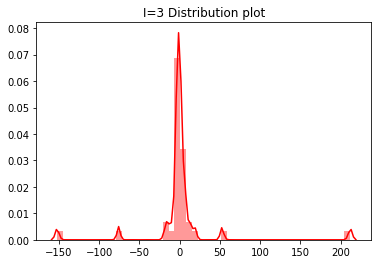

In [10]:
sns.distplot(df['mfcc'][1],color='red')
plt.title('I=3 Distribution plot')

Text(0.5, 1.0, 'I=4 Distribution plot')

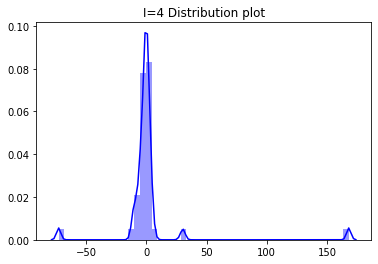

In [11]:
sns.distplot(df['mfcc'][27],color='blue')
plt.title('I=4 Distribution plot')

Text(0.5, 1.0, 'I=5 Distribution plot')

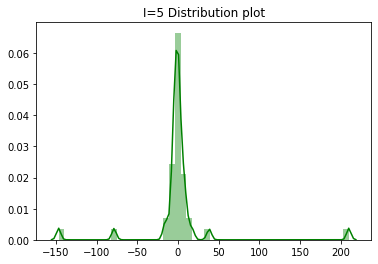

In [12]:
sns.distplot(df['mfcc'][78],color='green')
plt.title('I=5 Distribution plot')

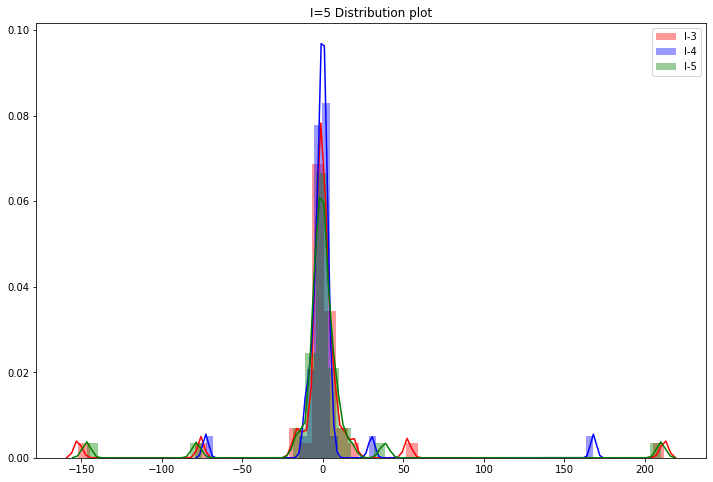

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(df['mfcc'][1],color='red',label='I-3')
plt.title('I=3 Distribution plot')
sns.distplot(df['mfcc'][27],color='blue',label='I-4')
plt.title('I=4 Distribution plot')
sns.distplot(df['mfcc'][78],color='green',label='I-5')
plt.title('I=5 Distribution plot')
plt.legend()

In [14]:
p=0
for i in df['mfcc'][1]:
    if i >-50 and i<50:
        p = p+1
print(p)

36


In [15]:
df['mfcc_mean'] = df['mfcc'].apply(lambda mfcc : mfcc.mean() )

In [16]:
df.head()

,interference,path,mfcc,mfcc_mean
0,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-131.37686, 227.78185, -96.030304, 54.124985,...",2.112172
1,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-152.18541, 212.1246, -75.82145, 52.74044, 18...",0.729980
2,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-154.4152, 207.58583, -83.73171, 49.88308, 11...",1.869403
3,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-165.0797, 206.83765, -102.65477, 52.450253, ...",-0.568734
4,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-146.89711, 219.33466, -90.32005, 52.043674, ...",2.014244


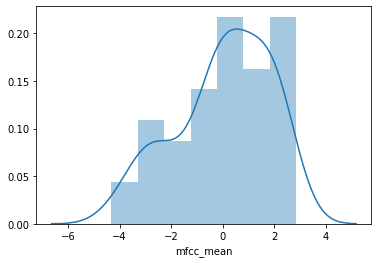

In [17]:
sns.distplot(df['mfcc_mean'])

In [18]:
df.sort_values(by='mfcc_mean')

,interference,path,mfcc,mfcc_mean
60,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-248.14806, 173.51059, -88.31516, 54.5438, -4...",-4.317466
46,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-222.15489, 185.71599, -85.34873, 48.83235, 1...",-3.969058
82,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-225.29514, 174.8578, -81.39085, 51.25709, 4....",-3.682232
49,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-221.63629, 184.15787, -82.81357, 54.739098, ...",-3.464358
71,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-213.03844, 165.0506, -74.52592, 43.167007, 7...",-3.249729
...,...,...,...,...
10,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-146.73839, 215.655, -94.03016, 55.37099, 12....",2.441844
28,4,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[25.935036, 158.24931, -70.0346, 37.239098, 7....",2.450947
31,4,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[58.711308, 145.8351, -65.50647, 26.38564, -9....",2.639589
29,4,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[64.57448, 129.9112, -62.592457, 38.574688, 0....",2.710288


In [19]:
from sklearn.preprocessing import LabelEncoder
X = np.array(df['mfcc'].tolist())
y = np.array(df['interference'].tolist())

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
clf.score(X_test,y_test)

0.8888888888888888

In [24]:
predict = clf.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predict))

[[ 2  0  1]
 [ 1  5  0]
 [ 1  0 17]]


In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           3       0.50      0.67      0.57         3
           4       1.00      0.83      0.91         6
           5       0.94      0.94      0.94        18

    accuracy                           0.89        27
   macro avg       0.81      0.81      0.81        27
weighted avg       0.91      0.89      0.90        27



In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
ml = MLPClassifier()

In [30]:
ml.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
ml.score(X_test,y_test)

0.7777777777777778

In [32]:
mlp = ml.predict(X_test)

In [33]:
print(classification_report(mlp,y_test))

              precision    recall  f1-score   support

           3       0.67      0.29      0.40         7
           4       1.00      1.00      1.00         6
           5       0.72      0.93      0.81        14

    accuracy                           0.78        27
   macro avg       0.80      0.74      0.74        27
weighted avg       0.77      0.78      0.75        27



In [34]:
def cal_zcr(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    zcr = np.mean(librosa.feature.zero_crossing_rate(X,frame_length=2048,hop_length=512,center=True))
    return zcr

In [35]:
df['zcr'] = df['path'].apply(cal_zcr)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

In [36]:
df.sort_values(by='zcr')

,interference,path,mfcc,mfcc_mean,zcr
72,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-162.59746, 210.01231, -71.06215, 51.193478, ...",-0.306281,0.057771
41,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-175.9916, 210.73727, -73.72359, 53.537228, 1...",-0.610267,0.060491
1,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-152.18541, 212.1246, -75.82145, 52.74044, 18...",0.729980,0.060887
11,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-166.27075, 204.28607, -69.38076, 55.398247, ...",0.517397,0.062534
87,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-156.1122, 207.83707, -69.89603, 47.104046, 1...",-0.238848,0.063015
...,...,...,...,...,...
45,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-109.972404, 241.6133, -132.3933, 57.25042, 0...",0.529171,0.116307
39,5,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-169.24913, 205.73112, -105.0609, 46.95023, 8...",-0.860923,0.119027
3,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-165.0797, 206.83765, -102.65477, 52.450253, ...",-0.568734,0.121395
9,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-126.328926, 218.52464, -118.96226, 59.654816...",1.633694,0.123930


In [37]:
def cal_sc(path):
        X,sample_rate = librosa.load(path,res_type='kaiser_fast')
        sc = np.mean(librosa.feature.spectral_centroid(X,sr=sample_rate,n_fft=2048,
                                                       hop_length=512,freq=None,win_length=None,window='hann',
                                                       center=True,pad_mode='reflect'))
        return sc

In [38]:
df['sc'] = df['path'].apply(cal_sc)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [39]:
def cal_rms(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    rms = np.mean(librosa.feature.rms(y=X,frame_length=2048,hop_length=512,center=True,pad_mode='reflect'))
    return rms

In [40]:
df['rms'] = df['path'].apply(cal_rms)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [41]:
def cal_melspectrogram(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    _melspectrogram = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                             win_length=None,window='hann',center=True, 
                                                             pad_mode='reflect',power=2.0))
    return _melspectrogram

In [42]:
df['melspectrogram'] = df['path'].apply(cal_melspectrogram)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


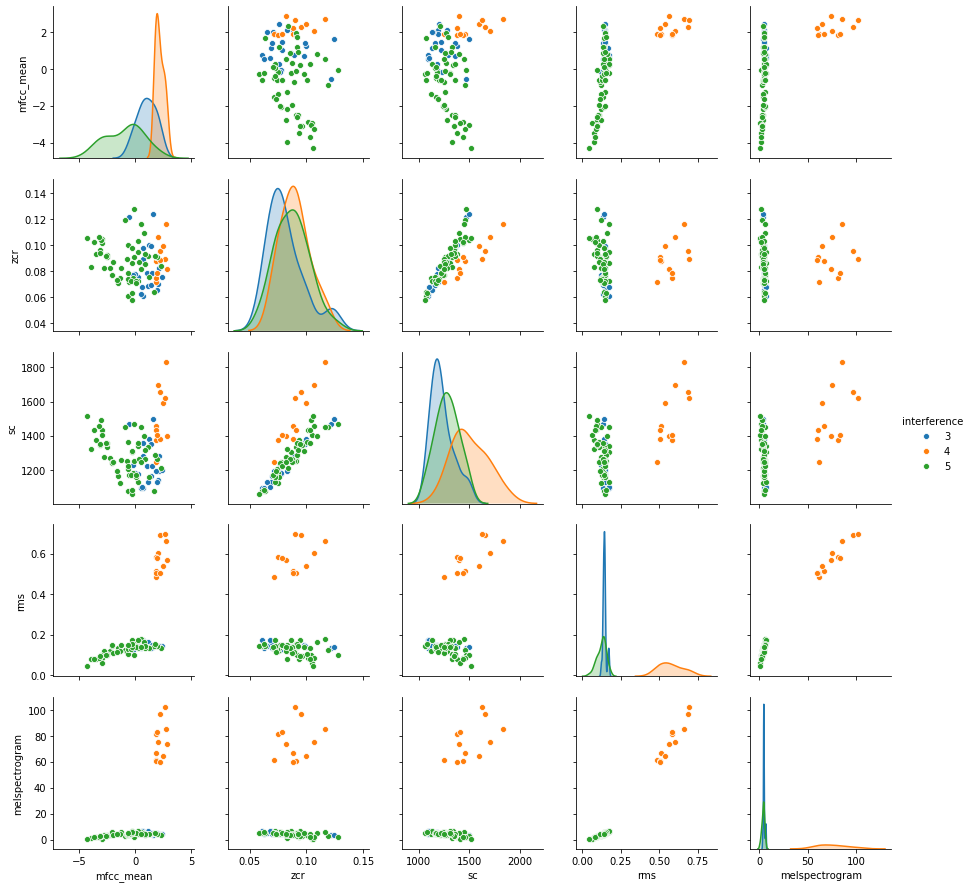

In [43]:
sns.pairplot(df,hue='interference',vars=['mfcc_mean','zcr','sc','rms','melspectrogram'])

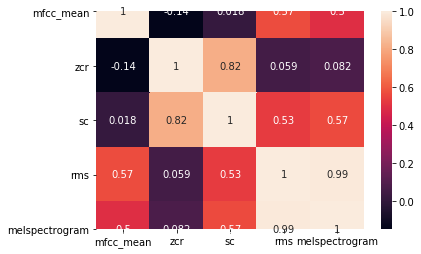

In [44]:
df1 = df[['mfcc_mean','zcr','sc','rms','melspectrogram']]
sns.heatmap(df1.corr(),annot=True)

In [45]:
df.head()

,interference,path,mfcc,mfcc_mean,zcr,sc,rms,melspectrogram
0,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-131.37686, 227.78185, -96.030304, 54.124985,...",2.112172,0.082634,1191.677533,0.145938,4.630924
1,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-152.18541, 212.1246, -75.82145, 52.74044, 18...",0.729980,0.060887,1092.225866,0.173567,6.968941
2,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-154.4152, 207.58583, -83.73171, 49.88308, 11...",1.869403,0.071624,1190.340956,0.145403,4.837517
3,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-165.0797, 206.83765, -102.65477, 52.450253, ...",-0.568734,0.121395,1467.007764,0.133121,3.483984
4,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-146.89711, 219.33466, -90.32005, 52.043674, ...",2.014244,0.070289,1141.962910,0.144590,4.700539


In [46]:
df1.corr()

,mfcc_mean,zcr,sc,rms,melspectrogram
mfcc_mean,1.000000,-0.144192,0.017689,0.571899,0.495099
zcr,-0.144192,1.000000,0.819333,0.058639,0.081910
sc,0.017689,0.819333,1.000000,0.532747,0.568010
rms,0.571899,0.058639,0.532747,1.000000,0.991547
melspectrogram,0.495099,0.081910,0.568010,0.991547,1.000000


In [47]:
X1 = df[['mfcc_mean','zcr','sc','rms','melspectrogram']]
y1 = df['interference']

In [48]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.33,random_state=234)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [50]:
dtc.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
dtc_pred = dtc.predict(X1_test)

In [52]:
print(confusion_matrix(y1_test,dtc_pred))

[[ 7  0  2]
 [ 0  4  0]
 [ 2  0 15]]


In [53]:
print(classification_report(y1_test,dtc_pred))

              precision    recall  f1-score   support

           3       0.78      0.78      0.78         9
           4       1.00      1.00      1.00         4
           5       0.88      0.88      0.88        17

    accuracy                           0.87        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.87      0.87      0.87        30



# AVERAGE

In [54]:
Xa = np.array(df['mfcc'].tolist())
ya = np.array(df['interference'].tolist())

In [55]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(Xa)
scaled_feature = scalar.transform(Xa)

In [56]:
Xaf = scaled_feature

In [57]:
from sklearn.tree import DecisionTreeClassifier
lst = []
for i in range(100,150):
    Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xaf,ya,test_size=0.3,random_state=i)
    clf = DecisionTreeClassifier()
    clf.fit(Xa_train,ya_train)
    
    lst.append(clf.score(Xa_test,ya_test))

In [58]:
sum(lst)/len(lst)

0.7333333333333333

In [59]:
Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xaf,ya,test_size=0.3,random_state=123)
clf = DecisionTreeClassifier()
clf.fit(Xa_train,ya_train)
print(clf.score(Xa_test,ya_test))

0.8148148148148148


In [60]:
ya_test-clf.predict(Xa_test)

array([ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0, -2,  0,  0,  0,  1,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0])

In [61]:
df['interference'].value_counts()

5    54
3    24
4    12
Name: interference, dtype: int64

In [62]:
df.head()

,interference,path,mfcc,mfcc_mean,zcr,sc,rms,melspectrogram
0,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-131.37686, 227.78185, -96.030304, 54.124985,...",2.112172,0.082634,1191.677533,0.145938,4.630924
1,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-152.18541, 212.1246, -75.82145, 52.74044, 18...",0.729980,0.060887,1092.225866,0.173567,6.968941
2,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-154.4152, 207.58583, -83.73171, 49.88308, 11...",1.869403,0.071624,1190.340956,0.145403,4.837517
3,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-165.0797, 206.83765, -102.65477, 52.450253, ...",-0.568734,0.121395,1467.007764,0.133121,3.483984
4,3,/Users/sanjeevkumar/Desktop/TWR/DATA Samples/I...,"[-146.89711, 219.33466, -90.32005, 52.043674, ...",2.014244,0.070289,1141.962910,0.144590,4.700539


In [63]:
writer = pd.ExcelWriter('interference_feature.xlsx',engine='xlsxwriter')
df.to_excel(writer,sheet_name='Sheet1')
writer.save()